# HW2

季宇桐

### 第一题

高斯消元法,先消元再回代

In [8]:
import numpy as np

#初始化
a = np.array([[0.05,0.07,0.06,0.05,0.23],[0.07,0.10,0.08,0.07,0.32],[0.06,0.08,0.10,0.09,0.33],[0.05,0.07,0.09,0.10,0.31]])
x = np.array([0,0,0,0],dtype=float)

i = 0 #消元
while i < 4:
    if(a[i][i] == 0):
        m = i
        while m >= 3:
            if a[m][i] == 0:
                a[[i,m],:]=a[[m,i],:]
                break
            else:
                m += 1
    j = i + 1
    while j < 4:
        l = -a[j][i]/a[i][i]
        k = i + 1
        while k <= 4:
            a[j][k] += l*a[i][k]
            k += 1
        j += 1
    i += 1

#回代法
i = 3
while i >= 0:
    x[i] = a[i][4]
    j = 3
    while j >= i+1:
        x[i] = x[i]-a[i][j]*x[j]
        j -= 1
    x[i]=x[i]/a[i][i]
    i -= 1

#输出两位小数
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

print(x)

[ 1.00  1.00  1.00  1.00]


Cholesky分解法

In [18]:
import numpy as np

#初始化
a = np.array([[0.05,0.07,0.06,0.05,0.23],[0.07,0.10,0.08,0.07,0.32],[0.06,0.08,0.10,0.09,0.33],[0.05,0.07,0.09,0.10,0.31]])
x = np.array([0,0,0,0],dtype=float)
y = np.array([0,0,0,0],dtype=float)

#Cholesky分解
for j in range(0,4):
    for k in range(0,j):
        a[j][j] = a[j][j] - a[j][k]**2
    a[j][j] = np.sqrt(a[j][j])
    for i in  range(j + 1, 4):
        for k in range(0,j):
            a[i][j] = a[i][j] - a[i][k]*a[j][k]
        a[i][j] = a[i][j]/a[j][j]

#前代法
i = 0
while i <= 3:
    y[i] = a[i][4]
    j = 0
    while j < i:
        y[i] = y[i]-a[i][j]*y[j]
        j += 1
    y[i]=y[i]/a[i][i]
    i += 1

#回代法
i = 3
while i >= 0:
    x[i] = y[i]
    j = 3
    while j >= i+1:
        x[i] = x[i]-a[j][i]*x[j]
        j -= 1
    x[i]=x[i]/a[i][i]
    i -= 1

#输出两位小数
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print(x)

[ 1.00  1.00  1.00  1.00]


### 第二题

先直接得到节点处的函数值

In [5]:
import math
a = math.cos(pow(0,2))
b = math.cos(pow(0.6,2))
c = math.cos(pow(0.9,2))

print (a, b, c)

1.0 0.9358968236779348 0.689498432951747



由上知$ f(x_0)=1,\quad f(x_1)\approx 0.9359,\quad f(x_2)\approx 0.6895$.

本题中$h_0=0.6,\quad h_1=0.3$.

（a）端点处的二次导数为0，这就是说，$x_0$和$x_2$的处的矩$M_0=M_2=0$。由此及一阶导数连续条件知道
$\begin{aligned}
M_1=d_1/2=3\left[\frac{y_0}{h_0(h_0+h_1)}+\frac{y_2}{h_1(h_0+h_1)}-\frac{y_1}{h_0 h_1}\right]=-2.3817
\end{aligned}$

对于$x\in [0,0.6]$, 

$\begin{aligned}
\quad A_0 & = \frac{y_{1}-y_0}{h_0}-\frac{h_0}{6}(M_1-M_0)=0.1313 \\
B_0& = y_0-M_0\frac{h_0^2}{6}=1\\
S(x)&=-\frac{M_0}{6h_0}(x-x_{1})^3+\frac{M_1}{6h_0}(x-x_0)^3+A_0(x-x_0)+B_0\\
&=-0.6616 x^3 + 0.1313 x + 1
\end{aligned}$

对于$x\in [0.6,0.9]$, 

$\begin{aligned}
\quad A_1 & = \frac{y_{2}-y_1}{h_1}-\frac{h_1}{6}(M_2-M_1)=-0.9404 \\
B_1& = y_1-M_1\frac{h_1^2}{6}=0.9716\\
S(x)&=-\frac{M_1}{6h_1}(x-x_{2})^3+\frac{M_2}{6h_1}(x-x_1)^3+A_1(x-x_1)+B_1\\
&=1.3231 (x-0.9)^3 - 9404 (x-0.6) + 0.9716\\
&=1.3231 x^3 - 3.5724 x^2 + 2.2747 x + 0.5713
\end{aligned}$

综上，

$
S(x)=\left\{
\begin{aligned}
&  -0.6616 x^3 + 0.1313 x + 1 & & x\in [0,0.6] \\
&  1.3231 x^3 - 3.5724 x^2 + 2.2747 x + 0.5713  & & x\in [0.6,0.9]
\end{aligned}
\right.
$

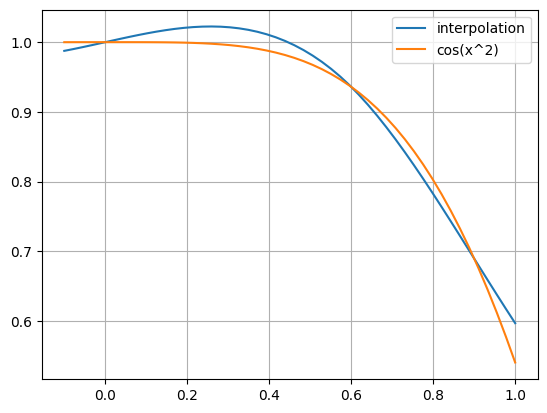

In [14]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    if x <= 0.6:
        return -0.6616*(x**3) + 0.1313*x + 1
    else:
        return 1.3231*(x**3) - 3.5724*(x**2) + 2.2747*x +0.5713
x = np.linspace(-0.1 , 1)
y1 = []
y2 = []
for i in x:
    y_1 = f(i)
    y1.append(y_1)
y2 = np.cos(x**2)
plt.plot(x, y1, label="interpolation")
plt.plot(x, y2, label="cos(x^2)")
plt.grid()
plt.legend()
plt.show()

图像如上，两个交点位于0.6，0.9，与预期值相符。

### 第三题

(a)考虑拉格朗日内插：

-1 0.038461538461538464 0.038461538461538464 0.0 

-0.95 0.042440318302387266 -39.95244903304199 39.994889351344376 

-0.8999999999999999 0.04705882352941177 0.04705882352944899 3.722022690055837e-14 

-0.8499999999999999 0.05245901639344263 3.454957799864045 3.4024987834706026 

-0.7999999999999998 0.05882352941176473 0.058823529411756025 8.708311849403572e-15 

-0.7499999999999998 0.06639004149377598 -0.44705196070883296 0.5134420022026089 

-0.6999999999999997 0.07547169811320761 0.07547169811320922 1.609823385706477e-15 

-0.6499999999999997 0.08648648648648656 0.20242261570455852 0.11593612921807196 

-0.5999999999999996 0.1000000000000001 0.09999999999999946 6.38378239159465e-16 

-0.5499999999999996 0.11678832116788336 0.08065999342165611 0.03612832774622725 

-0.4999999999999996 0.1379310344827588 0.13793103448275898 1.6653345369377348e-16 

-0.4499999999999996 0.16494845360824767 0.17976262990059858 0.014814176292350906 

-0.39999999999999963 0.2000000000000003 0.2000000000000

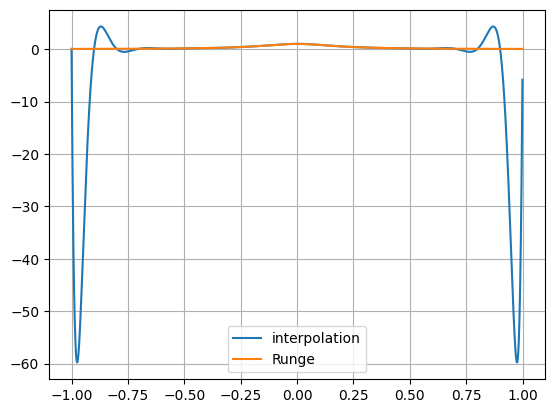

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def P_20(x):
    X = []
    y = []
    L = []
    for i in range(0,21):
        X.append(-1+0.1*i)
        L.append(1)
        y.append(1/(1+25*((-1+0.1*i)**2)))
    for i in range(0,21):
        m = 0
        while m<21:
            if m!=i:
                L[i]*=(x-X[m])/(X[i]-X[m])
            m += 1
    P = 0
    for i in range(0,21):
        P += y[i]*L[i]
    return P

x = -1
while x<=1:
    a = 1/(1+25*(x**2))
    b = P_20(x)
    c = abs(b-a)
    print(x,a,b,c,"\n")
    x += 0.05

x = np.arange(-1, 1, 0.001)
y1 = []
y2 = []
for i in x:
    y1.append(P_20(i))
    y2.append(1/(1+25*(i**2)))
plt.plot(x, y1, label="interpolation")
plt.plot(x, y2, label="Runge")
plt.grid()
plt.legend()
plt.show()

输出的从左到右分别是$\quad x,f(x),P_{20}(x),|\Delta|$.

可以看到，尽管在中部拟合的很好，但在两端存在严重的发散。

(b)Chebyshev方法：

0.996917333733128 0.03869055042259115 0.03869055042259139 2.42861286636753e-16 

0.996917333733128 0.03962267044383162 0.0410124239924958 0.001389753548664177 

0.9723699203976766 0.040588399387943605 0.040588399387943314 2.914335439641036e-16 

0.9723699203976766 0.04260120862978102 0.04102775107621095 0.001573457553570072 

0.9238795325112867 0.044765092294532106 0.04476509229453246 3.5388358909926865e-16 

0.9238795325112867 0.04825058119056361 0.050051229509278324 0.0018006483187147163 

0.8526401643540923 0.05215156157328421 0.05215156157328351 7.008282842946301e-16 

0.8526401643540923 0.057930760645491866 0.055760914785947885 0.0021698458595439812 

0.7604059656000309 0.06470217570115774 0.06470217570115791 1.6653345369377348e-16 

0.7604059656000309 0.07449870494508667 0.07729383136464837 0.0027951264195617 

0.6494480483301838 0.08662081571015402 0.08662081571015455 5.273559366969494e-16 

0.6494480483301838 0.10433928406814191 0.10042106388254068 0.003918220185601229 

0.5224

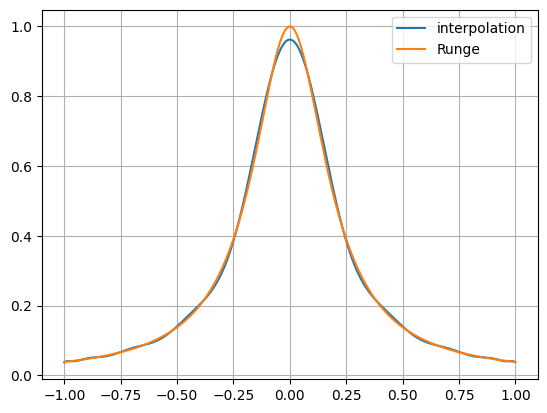

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

def S(x):
    X = []
    y = []
    T = []
    c = []
    S = 0
    for k in range(0,20):
        X.append(math.cos((k+0.5)*math.pi/20)) 
        y.append(1/(1+25*(X[k]**2)))
        c.append(0)
    for m in range(0,20):
        for k in range(0,20):
            c[m] += math.cos(m*(k+0.5)*math.pi/20)*y[k]
        if m==0:
            c[m]=c[m]/20
        else:
            c[m]=c[m]/10
        T.append(math.cos(m*math.acos(x)))
        S += c[m]*T[m]
    return S

x=[]
for k in range(0,20):
    x.append(math.cos((k+0.5)*math.pi/20))

for i in range(0,20):
    a = 1/(1+25*(x[i]**2))
    b = S(x[i])
    c = abs(b-a)
    print(x[i],a,b,c,"\n")#取中点展示
    if i!=19:
        a = 1/(1+25*(((x[i]+x[i+1])/2)**2))
        b = S((x[i]+x[i+1])/2)
        c = abs(b-a)
        print(x[i],a,b,c,"\n")

x = np.arange(-1, 1, 0.001)
y1 = []
y2 = []
for i in x:
    y1.append(S(i))
    y2.append(1/(1+25*(i**2)))
plt.plot(x, y1, label="interpolation")
plt.plot(x, y2, label="Runge")
plt.grid()
plt.legend()
plt.show()

输出格式同上，可以看出，这次插值的效果好了很多，在各个 Chebyshev 的节点处插值函数是严格等于f(x)的，两边也没有发散。

(c)三次样条函数插值：

所有的$h_j=0.1$，因此$\mu_j=\lambda_j=1/2$，取边界条件为$M_0=M_{20}=0$，则$M_j$满足的方程组为：

\begin{aligned}
\begin{pmatrix}
2 & \lambda_1 & 0 & \cdots \\
\mu_2 & 2 & \lambda_2 & 0 & \cdots \\
0 & \mu_3 & 2 & \lambda_3 & 0 & \cdots \\
&&&\cdots\\
 &\cdots & 0 & \mu_{19} & 2 & \lambda_{19} \\
 &\cdots & 0 & 0 & \mu_{20} & 2 \\
\end{pmatrix}
\begin{pmatrix}
M_1\\
M_2\\
\vdots\\
M_{18}\\
M_{19}
\end{pmatrix}
=
\begin{pmatrix}
d_1\\
d_2\\
\vdots\\
d_{18}\\
d_{19}
\end{pmatrix}
\end{aligned}

-1 0.038461538461538464 0.038461538461538464 0.0 

-0.95 0.042440318302387266 0.04253421642828388 9.389812589661456e-05 

-0.8999999999999999 0.04705882352941177 0.04705882352941177 0.0 

-0.8499999999999999 0.05245901639344263 0.05243128736673211 2.7729026710519855e-05 

-0.7999999999999998 0.05882352941176473 0.058823529411764726 6.938893903907228e-18 

-0.7499999999999998 0.06639004149377598 0.06639405338251338 4.011888737401326e-06 

-0.6999999999999997 0.07547169811320761 0.0754716981132076 1.3877787807814457e-17 

-0.6499999999999997 0.08648648648648656 0.08647363117868634 1.2855307800221927e-05 

-0.5999999999999996 0.1000000000000001 0.1000000000000001 0.0 

-0.5499999999999996 0.11678832116788336 0.11678687446502889 1.446702854471238e-06 

-0.4999999999999996 0.1379310344827588 0.1379310344827588 0.0 

-0.4499999999999996 0.16494845360824767 0.16486455736328096 8.389624496671355e-05 

-0.39999999999999963 0.2000000000000003 0.2000000000000003 0.0 

-0.34999999999999964 0.24615

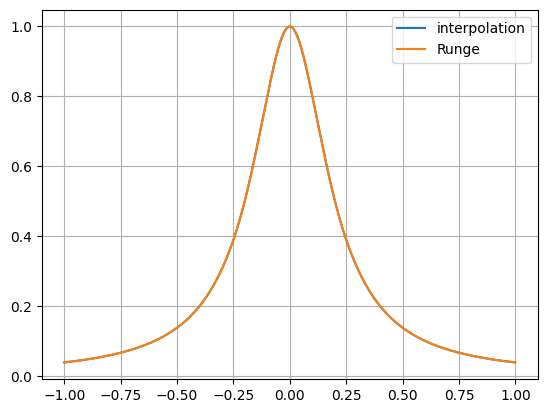

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def S(x):
    j = 0
    while x-(-1+j*0.1)>0:
        j+=1
    j = j - 1 #j区间
    X = []
    y = []
    M = [0.0]*21
    d = [] 
    for i in range(0,21):
        X.append(-1+0.1*i)
        y.append(1/(1+25*((-1+0.1*i)**2)))

    for i in range(1,20): #解方程组
        d.append(6*(y[i-1]/0.02 + y[i+1]/0.02 - y[i]/0.01))

    alpha = [0.0]*20
    beta = [0.0]*20 
    Y = [0.0]*20 #这里用数字直接代表第几项
    alpha[1]=2
    for i in range(2,20):
        beta[i] = 0.5/alpha[i-1]
        alpha[i] = 2 - beta[i]*0.5
    Y[1]=d[0]
    for i in range(2,20):
        Y[i] = d[i-1] - beta[i]*Y[i-1]
    M[19]=Y[19]/alpha[19]#注意M序号
    i = 18
    while i>0:
        M[i] = (Y[i]-0.5*M[i+1])/alpha[i]
        i-=1
    #至此M计算完毕

    s = -M[j]/0.6*((x-X[j+1])**3)+M[j+1]/0.6*((x-X[j])**3)+((y[j+1]-y[j])/0.1-0.1/6*(M[j+1]-M[j]))*(x-X[j])+y[j]-M[j]*0.01/6
    return s

x = -1
while x<=1:
    a = 1/(1+25*(x**2))
    b = S(x)
    c = abs(b-a)
    print(x,a,b,c,"\n")
    x += 0.05

x = np.arange(-1, 1, 0.001)
y1 = []
y2 = []
for i in x:
    y1.append(S(i))
    y2.append(1/(1+25*(i**2)))
plt.plot(x, y1, label="interpolation")
plt.plot(x, y2, label="Runge")
plt.grid()
plt.legend()
plt.show()

可以看到插值的效果非常好，在支撑点的中点处也只有$10^-5$级别的误差，也没有出现发散的情况。

### 第四题

(a)数值如下：

In [59]:
import math

for t in range(0,9):
    x = (1 - math.cos(t*math.pi/4))*math.cos(t*math.pi/4)
    y = (1 - math.cos(t*math.pi/4))*math.sin(t*math.pi/4)
    print(t,x,y)

0 0.0 0.0
1 0.20710678118654752 0.20710678118654752
2 6.123233995736765e-17 0.9999999999999999
3 -1.2071067811865475 1.2071067811865475
4 -2.0 2.4492935982947064e-16
5 -1.207106781186548 -1.2071067811865475
6 -1.8369701987210302e-16 -1.0000000000000002
7 0.2071067811865476 -0.20710678118654768
8 0.0 -0.0


输出的分别是: $t,x,y$

(b)样条函数：本题中$h_i=1,\mu=\lambda=1/2$，仍取同一边界条件，这样解$M$的矩阵与上一题只有阶数和$d$上的区别，对上题代码做修改：

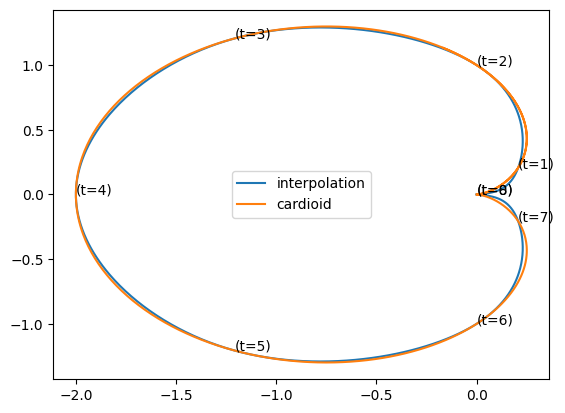

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Sx(t):
    j = 0
    while t-j>0:
        j+=1
    j = j - 1 #j区间
    #初始化
    x = []
    for i in range(0,9):
        x.append((1 - math.cos(i*math.pi/4))*math.cos(i*math.pi/4))

    M = [0.0]*9#M_0=M_8=0
    d = []

    for i in range(1,8): #解方程组
        d.append(6*(x[i-1]/2 + x[i+1]/2 - x[i]))

    alpha = [0.0]*8
    beta = [0.0]*8
    Y = [0.0]*8 #这里用数字直接代表第几项
    alpha[1]=2
    for i in range(2,8):
        beta[i] = 0.5/alpha[i-1]
        alpha[i] = 2 - beta[i]*0.5
    Y[1]=d[0]
    for i in range(2,8):
        Y[i] = d[i-1] - beta[i]*Y[i-1]
    M[7]=Y[7]/alpha[7]#注意M序号
    i = 6
    while i>0:
        M[i] = (Y[i]-0.5*M[i+1])/alpha[i]
        i-=1
    #至此M计算完毕

    s = -M[j]/6*((t-(j+1))**3)+M[j+1]/6*((t-j)**3)+((x[j+1]-x[j])-1/6*(M[j+1]-M[j]))*(t-j)+x[j]-M[j]/6
    return s

def Sy(t):
    j = 0
    while t-j>0:
        j+=1
    j = j - 1 #j区间
    #初始化
    T = [0,1,2,3,4,5,6,7,8]
    x = []
    y = []
    for i in range(0,9):
        y.append((1 - math.cos(i*math.pi/4))*math.sin(i*math.pi/4))

    M = [0.0]*9#M_0=M_8=0
    d = []

    for i in range(1,8): #解方程组
        d.append(6*(y[i-1]/2 + y[i+1]/2 - y[i]))

    alpha = [0.0]*8
    beta = [0.0]*8
    Y = [0.0]*8 #这里用数字直接代表第几项
    alpha[1]=2
    for i in range(2,8):
        beta[i] = 0.5/alpha[i-1]
        alpha[i] = 2 - beta[i]*0.5
    Y[1]=d[0]
    for i in range(2,8):
        Y[i] = d[i-1] - beta[i]*Y[i-1]
    M[7]=Y[7]/alpha[7]#注意M序号
    i = 6
    while i>0:
        M[i] = (Y[i]-0.5*M[i+1])/alpha[i]
        i-=1
    #至此M计算完毕

    s = -M[j]/6*((t-(j+1))**3)+M[j+1]/6*((t-j)**3)+((y[j+1]-y[j])-1/6*(M[j+1]-M[j]))*(t-j)+y[j]-M[j]/6
    return s


#绘制曲线
t = np.linspace(0, 8, 1000)
x = []
y = []
for i in t:
    x.append(Sx(i))
    y.append(Sy(i))
x1 = (1-np.cos(t))*np.cos(t)
y1 = (1-np.cos(t))*np.sin(t)
plt.plot(x, y, label="interpolation")
plt.plot(x1, y1, label="cardioid")
for i in range(0,9):
    plt.text(Sx(i),Sy(i),"(t="+str(i)+")")
plt.legend()
plt.show()

在上一段程序中我们直接给出了$S_\Delta(X;t)$和$S_\Delta(Y;t)$的函数程序形式，可以修改输入的$x$获得输出值。我们用此程序做出对应的图(t=0和t=8处重合)，可以看出插值的拟合效果比较接近真实值。

(d)因为三次样条插值二阶导数连续，参数方程形成的曲线本身是分段光滑的，在连接处也可以做到$C^2$连续，因此可以较为平滑地连接。

### 第五题

(a)通过消元法构造Frobinius矩阵，我们得到

$\begin{pmatrix}
1 & 0 & 0\\
1/2 & 1 & 0\\
1/3 & 2/3 & 1
\end{pmatrix}H=\begin{pmatrix}
2 & -1 & 0\\
0 & 3/2 & -1\\
0 & 0 & 1/3
\end{pmatrix}$

求逆矩阵后得到H的LU分解

$H=\begin{pmatrix}
1 & 0 & 0\\
-1/2 & 1 & 0\\
0 & -2/3 & 1
\end{pmatrix}
\begin{pmatrix}
2 & -1 & 0\\
0 & 3/2 & -1\\
0 & 0 & 1/3
\end{pmatrix}$

令

$L=\begin{pmatrix}
1 & 0 & 0\\
-1/2 & 1 & 0\\
0 & -2/3 & 1
\end{pmatrix}$

则不难得到

$H=\begin{pmatrix}
1 & 0 & 0\\
-1/2 & 1 & 0\\
0 & -2/3 & 1
\end{pmatrix}
\begin{pmatrix}
2 &  & \\
 & 3/2 & \\
 &  & 1/3
\end{pmatrix}
\begin{pmatrix}
1 & -1/2 & 0\\
0 & 1 & -2/3\\
0 & 0 & 1
\end{pmatrix}$

即

$D=\begin{pmatrix}
2 &  & \\
 & 3/2 & \\
 &  & 1/3
\end{pmatrix}$

(b)将$H_{33}$替换为$q$后,新的分解为：

$H=\begin{pmatrix}
1 & 0 & 0\\
-1/2 & 1 & 0\\
0 & -2/3 & 1
\end{pmatrix}
\begin{pmatrix}
2 &  & \\
 & 3/2 & \\
 &  & q-2/3
\end{pmatrix}
\begin{pmatrix}
1 & -1/2 & 0\\
0 & 1 & -2/3\\
0 & 0 & 1
\end{pmatrix}$

要使$H$是半正定的，有$q\ge \frac{2}{3}$，即最小的$q$是$\frac{2}{3}$.

(c)由

$\det(H-\lambda I)=0$得$(2-\lambda)^3-2(2-\lambda)=0$，

解得$\lambda_1=2,\lambda_2=2+\sqrt{2},\lambda_3=2-\sqrt{2}$

$H$扩展到$4\times4$后，同理有

$\det(H-\lambda I)=0$得$\lambda^4-8\lambda^3+21\lambda^2-20\lambda+5=0$，

解得$\lambda_1=3.618,\lambda_2=2.618,\lambda_3=1.382,\lambda_4=0.382$.